<h1 align="center">Traffic Sign Recognition</h1>

## Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from flask import Flask,render_template,request
from pathlib import Path 

### Reading the Input Image

In [4]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "input/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

input/Train/0/
input/Train/1/
input/Train/2/
input/Train/3/
input/Train/4/
input/Train/5/
input/Train/6/
input/Train/7/
input/Train/8/
input/Train/9/
input/Train/10/
input/Train/11/
input/Train/12/
input/Train/13/
input/Train/14/
input/Train/15/
input/Train/16/
input/Train/17/
input/Train/18/
input/Train/19/
input/Train/20/
input/Train/21/
input/Train/22/
input/Train/23/
input/Train/24/
input/Train/25/
input/Train/26/
input/Train/27/
input/Train/28/
input/Train/29/
input/Train/30/
input/Train/31/
input/Train/32/
input/Train/33/
input/Train/34/
input/Train/35/
input/Train/36/
input/Train/37/
input/Train/38/
input/Train/39/
input/Train/40/
input/Train/41/
input/Train/42/


### Spliting the images into train and validation sets

In [5]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using onehot encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

### Defining Dense Neural Network

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

### Training the Model

In [7]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))
model.save('my_model.h5')

Epoch 1/10
981/981 [==============================] - 49s 50ms/step - loss: 1.2528 - accuracy: 0.6436 - val_loss: 0.1695 - val_accuracy: 0.9617
Epoch 2/10
981/981 [==============================] - 50s 50ms/step - loss: 0.2368 - accuracy: 0.9288 - val_loss: 0.0712 - val_accuracy: 0.9848
Epoch 3/10
981/981 [==============================] - 52s 54ms/step - loss: 0.1380 - accuracy: 0.9577 - val_loss: 0.0455 - val_accuracy: 0.9881
Epoch 4/10
981/981 [==============================] - 54s 55ms/step - loss: 0.0995 - accuracy: 0.9702 - val_loss: 0.0354 - val_accuracy: 0.9920
Epoch 5/10
981/981 [==============================] - 58s 59ms/step - loss: 0.0801 - accuracy: 0.9754 - val_loss: 0.0392 - val_accuracy: 0.9898
Epoch 6/10
981/981 [==============================] - 59s 60ms/step - loss: 0.0673 - accuracy: 0.9782 - val_loss: 0.0323 - val_accuracy: 0.9920
Epoch 7/10
981/981 [==============================] - 59s 60ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0271 - val_accuracy:

### Display of the accuracy and the loss values

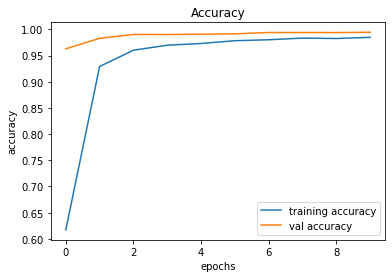

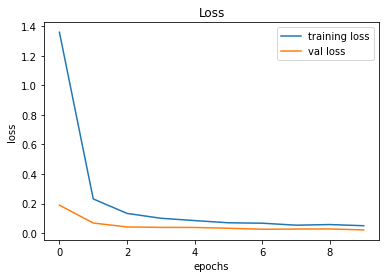

In [8]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Predicting the Test Data

In [9]:
#Predicting with the test data
y_test=pd.read_csv("Test.csv")
labels=y_test['Path'].values
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('input/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## Accuracy

In [10]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9738717339667459

### End of the Jupyter Notebook